<a href="https://colab.research.google.com/github/estermmorales/visualizacao/blob/main/Grafo_Disciplinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
tic_df = pd.read_csv('disciplinas_tic.csv')

In [ ]:
tic_df

,source,target
0,Empreendedorismo,Informática na Educação
1,Empreendedorismo,Algoritmos e Programação
2,Empreendedorismo,Fundamentos Matemáticos para Computação
3,Empreendedorismo,Introdução às Tecnologias da Informação e Comu...
4,Empreendedorismo,Elaboração de Trabalhos Acadêmicos
...,...,...
101,Estrutura de Dados e Algoritmos,Inteligência Artificial
102,Banco de Dados,Desenvolvimento de Sistemas Web
103,Introdução às Tecnologias da Informação e Comu...,Estrutura de Computadores
104,Estrutura de Computadores,Sistemas Operacionais


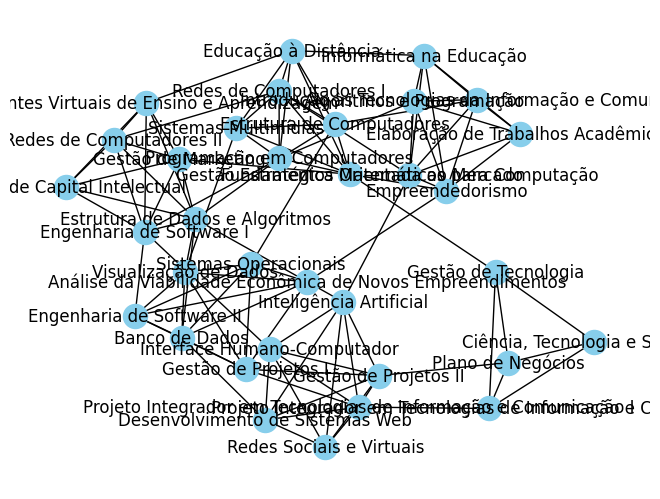

In [ ]:
#Criação do grafo à partir do dataframe usando o Networkx

G = nx.from_pandas_edgelist(tic_df, source="source", target="target", create_using=nx.Graph())
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color="skyblue", edge_cmap=plt.cm.Blues, pos= pos)
plt.show()

In [ ]:
print("Nós: ", nx.number_of_nodes(G))
print("Arestas: ", nx.number_of_edges(G))

Nós:  34
Arestas:  106


In [ ]:
# Melhorando a visualização com a biblioteca Pyvis

#!pip install pyvis
from pyvis.network import Network
from IPython.core.display import display, HTML
net = Network(notebook=True, cdn_resources='in_line', width="1000px", height="700px", bgcolor="#222", font_color="white")

net.from_nx(G)
net.repulsion()

net.show('tic.html')
display(HTML('tic.html'))

tic.html


In [ ]:
# Detecção das comunidades com a biblioteca Community

import community.community_louvain as community_louvain

communities = community_louvain.best_partition(G)
nx.set_node_attributes(G, communities, 'group')

com_net = Network(notebook=True, cdn_resources='in_line', width="1000px", height="700px", bgcolor="#222", font_color="white")
com_net.from_nx(G)
com_net.repulsion()

com_net.show('tic_com.html')
display(HTML('tic_com.html'))

tic_com.html


<Axes: >

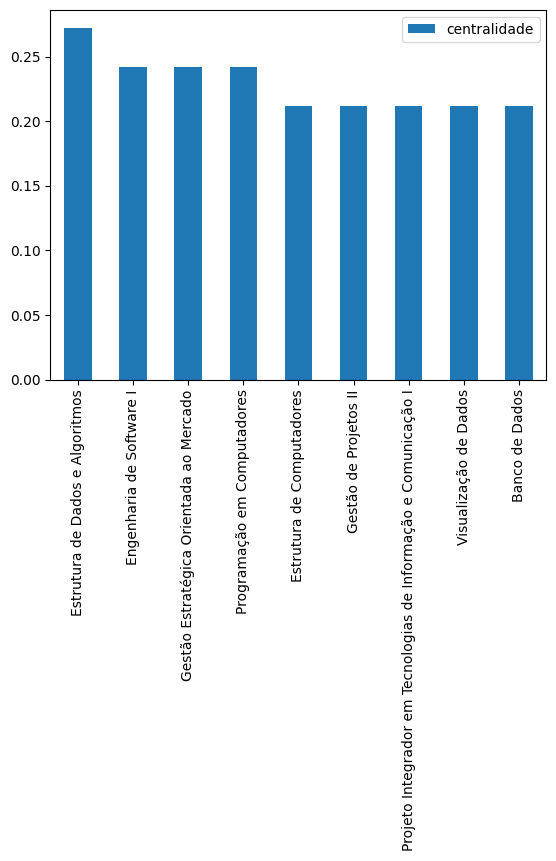

In [ ]:
#Extraindo métricas
#Cálculo da centralidade de grau (Nó com mais conexões)

degree_cent = nx.degree_centrality(G)
degree_cent_df = pd.DataFrame.from_dict(degree_cent, orient='index', columns=['centralidade'])
degree_cent_df.sort_values('centralidade', ascending=False) [0:9].plot(kind="bar")

<Axes: >

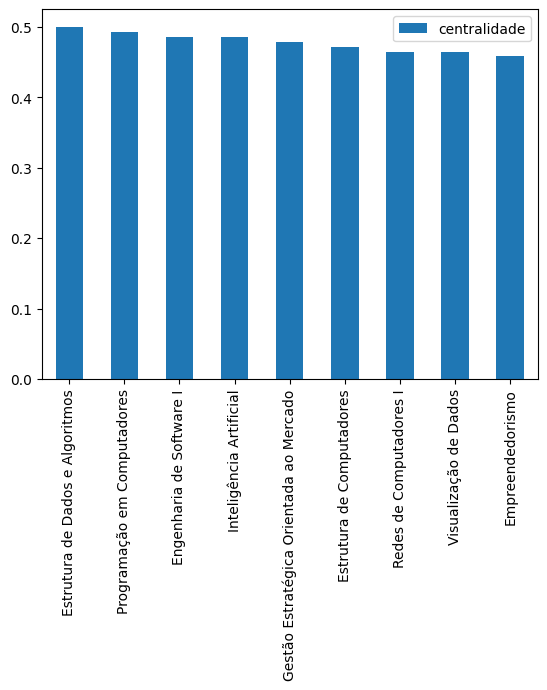

In [ ]:
#Cálculo da centralidade de proximidade (Nó mais próximo de todos os outros)

degree_cent = nx.closeness_centrality(G)
degree_cent_df = pd.DataFrame.from_dict(degree_cent, orient='index', columns=['centralidade'])
degree_cent_df.sort_values('centralidade', ascending=False) [0:9].plot(kind="bar")